In [2]:
import numpy as np
import librosa
from matplotlib import pyplot as plt
import librosa.display

# 加载信号
wave_path = "audio_data/Kanon D dur (Qurtet) - V.A.mp3"
waveform, sample_rate = librosa.load(wave_path, sr=None) # 默认16000采样率。waveform为音频信号时间序列波形​​（幅值归一化到 [-1, 1]）

In [5]:
def cal_amplitude_envelope(waveform, frame_length, hop_length):
    waveform_ae = []
    if len(waveform) % hop_length!= 0:
        frame_num = int((len(waveform)-frame_length) / hop_length) + 1
        pad_num = frame_num*hop_length + frame_length - len(waveform) # 补零个数
        waveform = np.pad(waveform, (0, pad_num), mode = 'wrap') # wrap循环填充
    frame_num = int((len(waveform)-frame_length) / hop_length) + 1
    for i in range(frame_num):
        cur_frame = waveform[i*hop_length:i*hop_length+frame_length]
        cur_ae = max(cur_frame)
        waveform_ae.append(cur_ae)
    return np.array(waveform_ae)


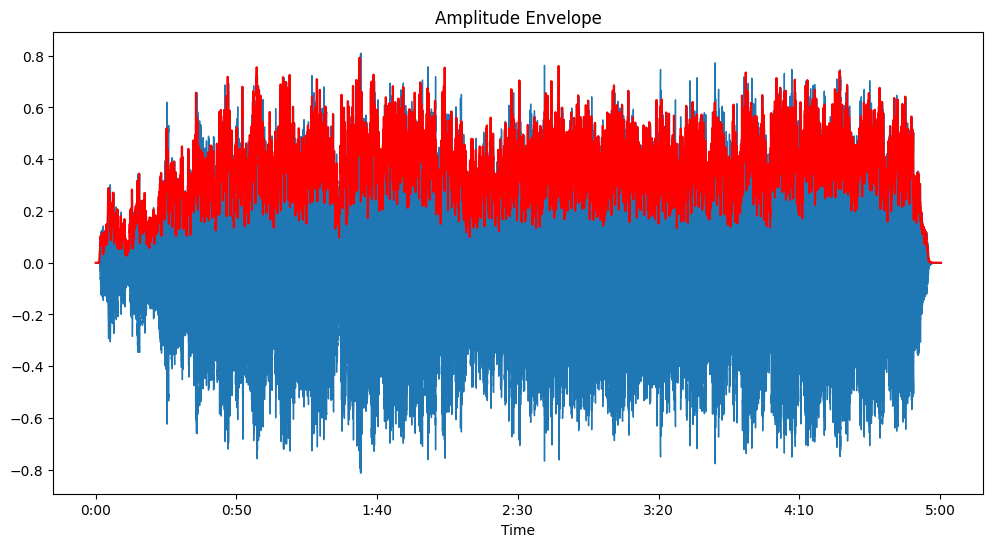

In [ ]:
frame_size = 1024
hop_size = 512
waveform_AE = cal_amplitude_envelope(waveform, frame_size, hop_size)
time_scale = np.arange(0, len(waveform_AE))
time_scale = librosa.frames_to_time(np.arange(len(waveform_AE)), sr=sample_rate, hop_length=hop_size) # 转换成以秒为单位的时间轴

plt.figure(figsize=(12, 6))
librosa.display.waveshow(waveform, sr=sample_rate)
plt.plot(time_scale, waveform_AE, color = 'r')
plt.title('Amplitude Envelope')
plt.show()
